In [3]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Differential equations over infinite ranges

Suppose we want to find a solution all the way out to $t = \infty$. This presents problems because we need to have an infinite nubmer of steps to use Runge-Kutta methods. Remember we want to solve
\
\
    $$\frac{dx}{dt} = f(x,t)$$
\
\
given an initial condition. We make a change of variable 
\
\
    $$u = \frac{t}{1 + t} \qquad \Leftrightarrow \qquad t = \frac{u}{1-u}$$
\
\
So that as $t \to \infty$ we have $u \to 1$. Then the differential equation becomes 
\
\
    \begin{align*}
        \frac{dx}{du}\frac{du}{dt} &= f\left(x,\frac{u}{1-u}\right)\\
        \frac{dx}{du} &= \frac{dt}{du} f\left(x,\frac{u}{1-u}\right)
    \end{align*}
\
\
But we know that 
\
\
    $$\frac{dt}{du} = \frac{1}{(1-u)^2}$$
\
\
So that 
    \begin{align*}
        \frac{dx}{du} &= \frac{1}{(1-u)^2} f\left(x,\frac{u}{1-u}\right)
    \end{align*}
We define the RHS as a function $g(x,u)$
\
\
    \begin{align*}
        \frac{dx}{du} &= g(x,u)
    \end{align*}
\
\
We recall that $u \in [0,1]$. 

# Problem

We want to solve 
\
\
    $$\frac{dx}{dt} = \frac{1}{x^2 + t^2}$$
\
\
from $t=0$ to $t = \infty$ with $x(0)=1$. This is equivalent to 
\
\
    $$\frac{dx}{du} = \frac{1}{x^2(1 - u)^2 + u^2}$$
\
\
from $u = 0$ to $u=1$, with an initial condition $x(0) = 1$.

In [5]:
def rk4(f, x0, t):
    '''
    f: function
    x0: initial condition
    t: grid of evenly-spaced t-values
    '''
    
    a = t[0]
    b = t[-1]
    h = (b - a) / len(t) # stepsize
    
    # Instantiate a new array
    x = np.zeros(len(t))
    x[0] = x0 # Plugs initial condition
    
    for j in range(0, len(t)-1):
        k1 = h*f(x[j], t[j])
        k2 = h*f(x[j] + 0.5*k1, t[j] + 0.5*h)
        k3 = h*f(x[j] + 0.5*k2, t[j] + 0.5*h)
        k4 = h*f(x[j] + k3, t[j] + h)
        x[j + 1] = x[j] + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return x

<ipython-input-6-0cfd284117a4>:11: RuntimeWarning: divide by zero encountered in true_divide
  t = u / (1 - u)


<IPython.core.display.Javascript object>


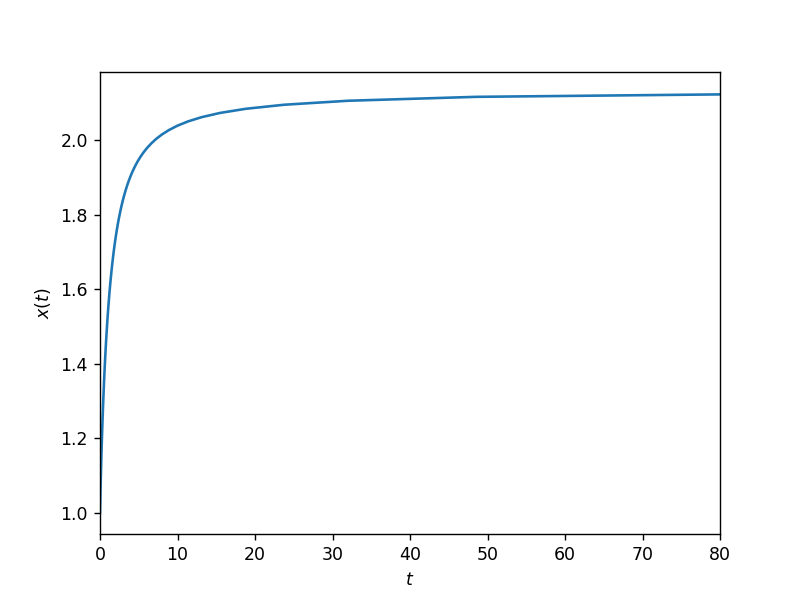

Text(0, 0.5, '$x(t)$')

In [6]:
g = lambda x,u: 1/(x**2*(1-u)**2 + u**2)

a = 0
b = 1
N = 100
u = np.linspace(a,b,N)

x0 = 1
x = rk4(g, x0, u)

t = u / (1 - u)

plt.figure()
plt.plot(t, x)
plt.xlim(0,80)
plt.xlabel(r"$t$")
plt.ylabel(r"$x(t)$")